In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pylab as plt
import json
from scipy.stats import linregress
import datetime
import numpy as np
import requests
import time


states = gpd.read_file('cb_2018_us_state_500k.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [31]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


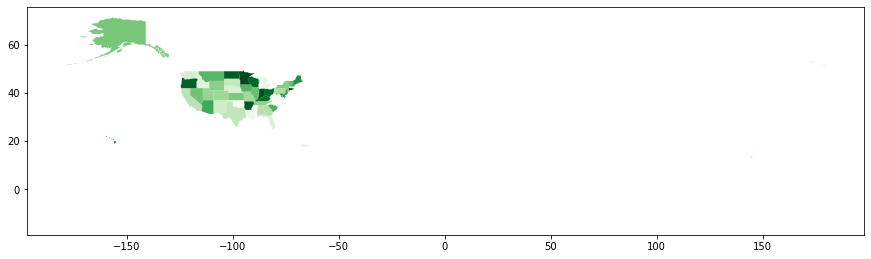

In [32]:
states.plot(cmap='Greens', figsize=(15,15))

In [33]:
cont_us = states[states['STUSPS'].isin(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])]
cont_us


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


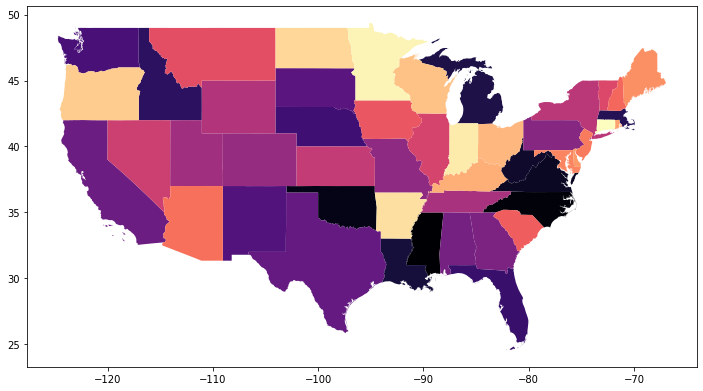

In [34]:
cont_us.plot(cmap='magma', figsize=(12,12))

In [35]:
state_cases = pd.read_csv("corona_by_state.csv")
state_cases.head()

,date,State_Code,positive,negative,percent_positive,positivity_over_10,pending,mask_required,red_state,hospitalizedCurrently,...,percent_positive_5_15,mask_required_5_15,percent_positive_6_1,mask_required_6_1,percent_positive_6_15,mask_required_6_15,percent_positive_7_1,mask_required_7_1,percent_positive_7_15,mask_required_7_15
0,20200726,AL,79294,570392,0.12,1,NaN,0,1,1505,...,0.076789,0,0.082153,0,0.086800,0,0.094122,0,0.109171,0
1,20200726,AR,38623,438644,0.08,0,NaN,0,1,479,...,0.054741,0,0.055863,0,0.063276,0,0.067322,0,0.076551,0
2,20200726,AZ,162014,705089,0.19,1,NaN,0,1,2650,...,0.092739,0,0.088232,0,0.106312,0,0.153007,0,0.178479,0
3,20200726,CA,453659,6714480,0.06,0,NaN,1,0,8820,...,0.066087,0,0.056150,0,0.052804,0,0.055508,1,0.060006,1
4,20200726,CO,43789,446607,0.09,0,NaN,0,0,338,...,0.176548,0,0.141531,0,0.116948,0,0.099892,0,0.091919,0


In [36]:
merged = cont_us.merge(state_cases, how='left', left_on="STUSPS", right_on="State_Code")
merged = merged[['NAME', 'date', 'STUSPS', 'geometry', 'positivity_over_10', 'positive', 'negative', 'percent_positive', 'mask_required', 'red_state']]
merged.head()

,NAME,date,STUSPS,geometry,positivity_over_10,positive,negative,percent_positive,mask_required,red_state
0,Mississippi,20200726,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",1,52304,370789,0.12,0,1
1,North Carolina,20200726,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0,112713,1500672,0.07,1,1
2,Oklahoma,20200726,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0,31285,535628,0.06,0,1
3,Virginia,20200726,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0,84567,943673,0.08,1,0
4,West Virginia,20200726,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0,5960,255766,0.02,1,1


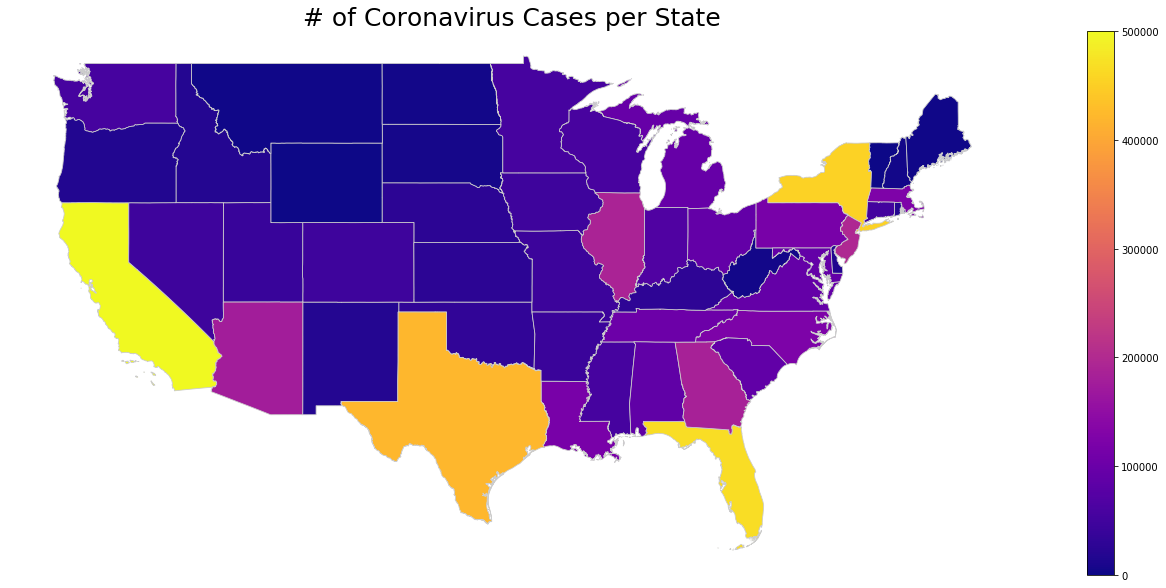

In [37]:
variable = 'positive'

vmin, vmax = 0, 500000

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('# of Coronavirus Cases per State', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Cases_per_State.png')

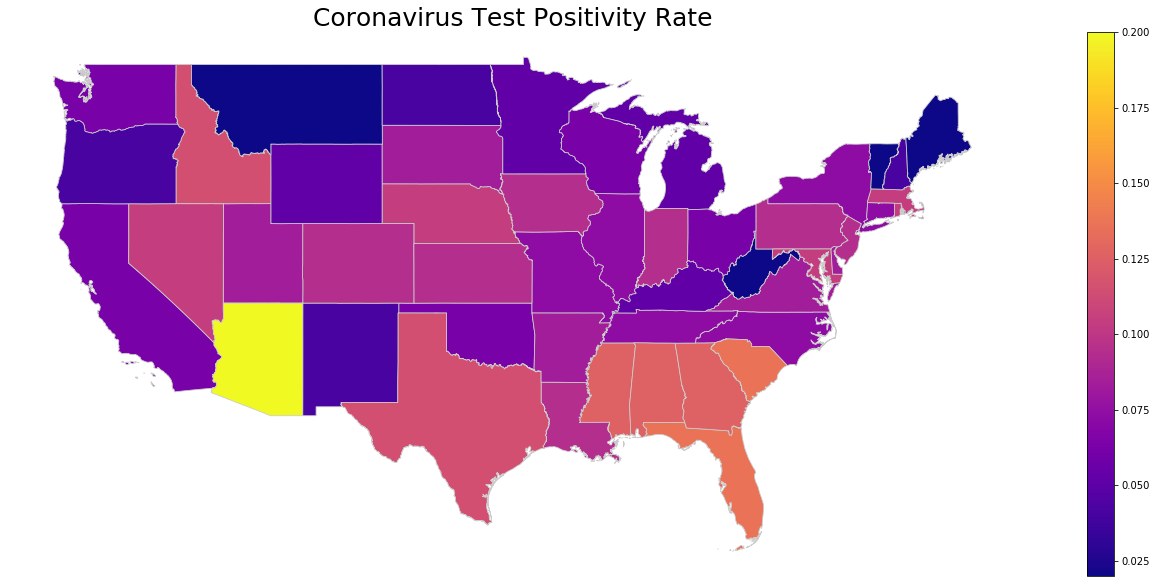

In [38]:
variable = 'percent_positive'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate.png')

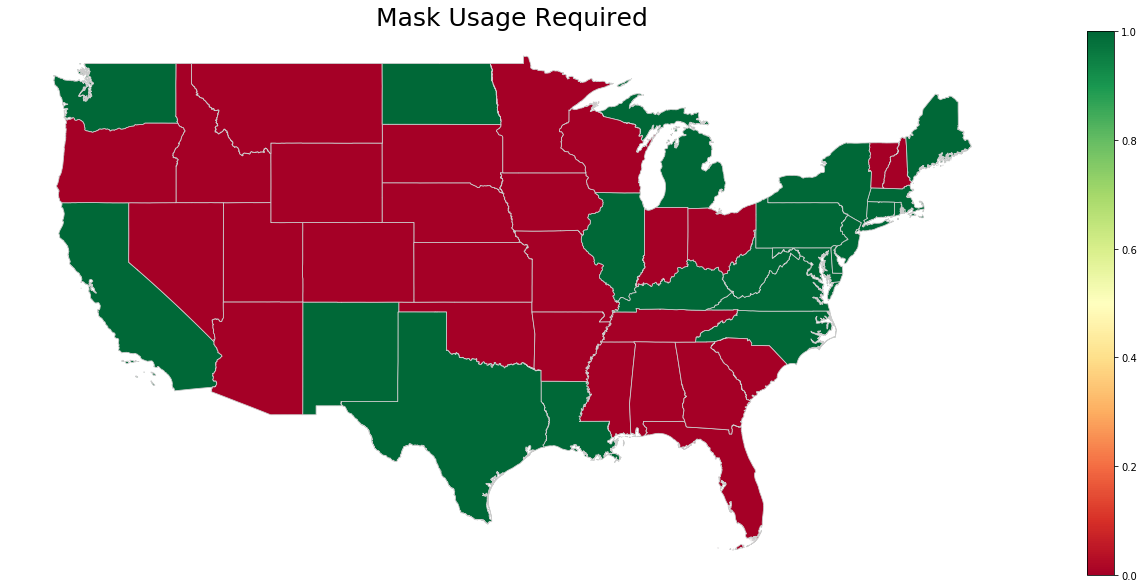

In [39]:
variable = 'mask_required'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required.png')

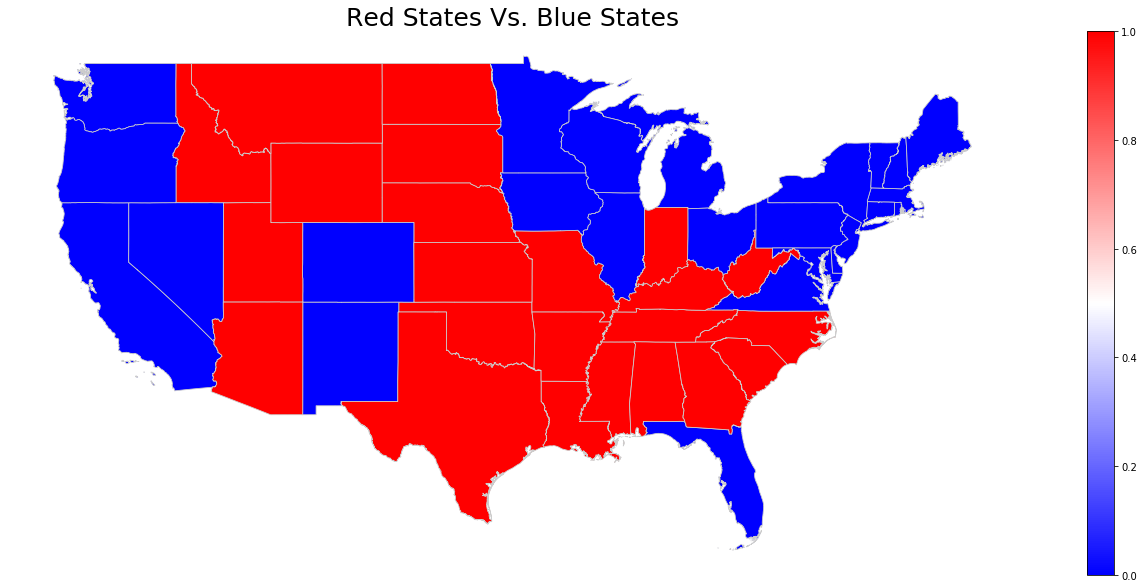

In [40]:
variable = 'red_state'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Red States Vs. Blue States', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='bwr', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='bwr', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('red_vs_blue.png')

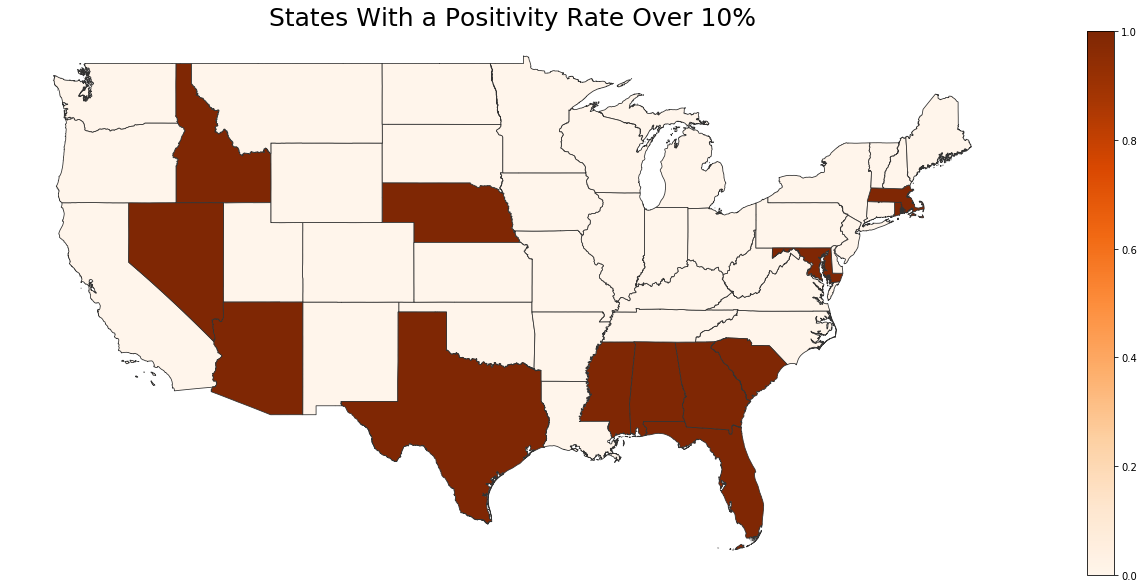

In [41]:
variable = 'positivity_over_10'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('States With a Positivity Rate Over 10%', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='.2')

plt.savefig('positivity_over_10.png')

In [42]:
merged = cont_us.merge(state_cases, how='left', left_on="STUSPS", right_on="State_Code")
merged = merged[['NAME', 'date', 'STUSPS', 'geometry', 'positivity_over_10', 'positive', 'negative', 'percent_positive', 'mask_required', 'red_state', 'percent_positive_4_1', 'mask_required_4_1', 'percent_positive_4_15', 'mask_required_4_15', 'percent_positive_5_1', 'mask_required_5_1', 'percent_positive_5_15', 'mask_required_5_15', 'percent_positive_6_1', 'mask_required_6_1', 'percent_positive_6_15', 'mask_required_6_15', 'percent_positive_7_1', 'mask_required_7_1', 'percent_positive_7_15', 'mask_required_7_15']]
merged.head()

,NAME,date,STUSPS,geometry,positivity_over_10,positive,negative,percent_positive,mask_required,red_state,...,percent_positive_5_15,mask_required_5_15,percent_positive_6_1,mask_required_6_1,percent_positive_6_15,mask_required_6_15,percent_positive_7_1,mask_required_7_1,percent_positive_7_15,mask_required_7_15
0,Mississippi,20200726,MS,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",1,52304,370789,0.12,0,1,...,0.101111,0,0.089371,0,0.085895,0,0.094978,0,0.108074,0
1,North Carolina,20200726,NC,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0,112713,1500672,0.07,1,1,...,0.073976,0,0.069359,0,0.070640,0,0.070590,1,0.071044,1
2,Oklahoma,20200726,OK,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0,31285,535628,0.06,0,1,...,0.043032,0,0.034009,0,0.033533,0,0.040749,0,0.050999,0
3,Virginia,20200726,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0,84567,943673,0.08,1,0,...,0.161066,0,0.139807,1,0.114585,1,0.095961,1,0.087016,1
4,West Virginia,20200726,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0,5960,255766,0.02,1,1,...,0.020314,0,0.020562,0,0.017415,0,0.016914,0,0.020913,1


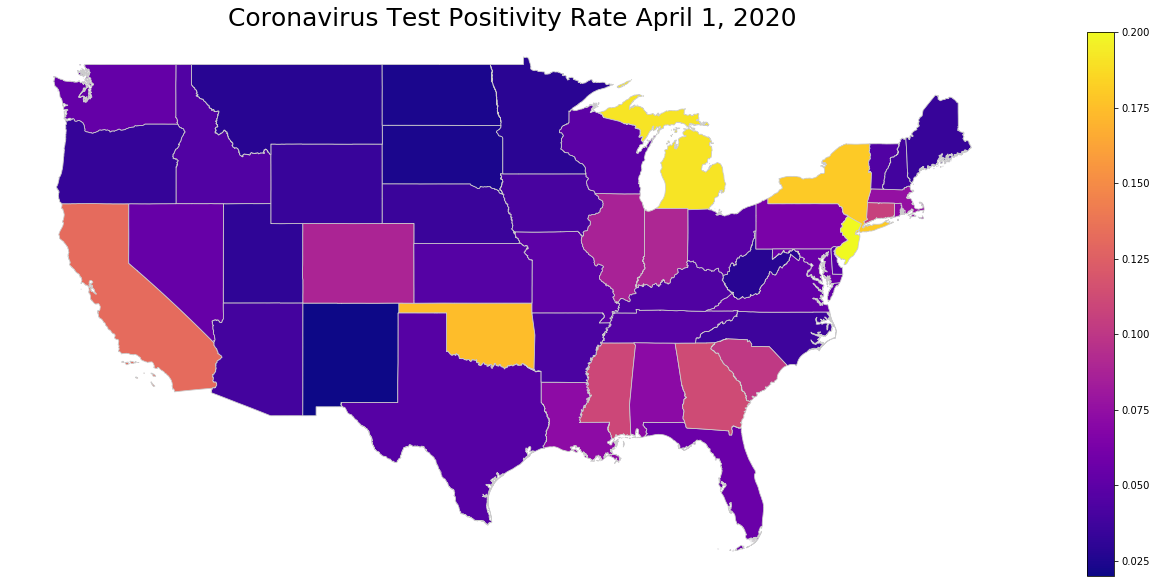

In [43]:
variable = 'percent_positive_4_1'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate April 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_4_1.png')

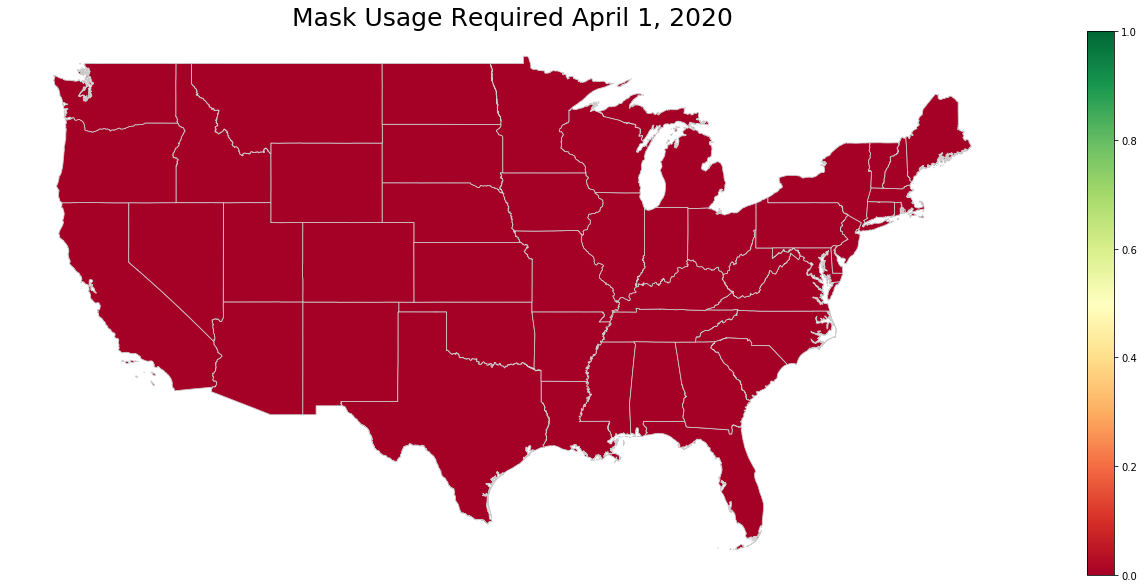

In [44]:
variable = 'mask_required_4_1'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required April 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_4_1.png')

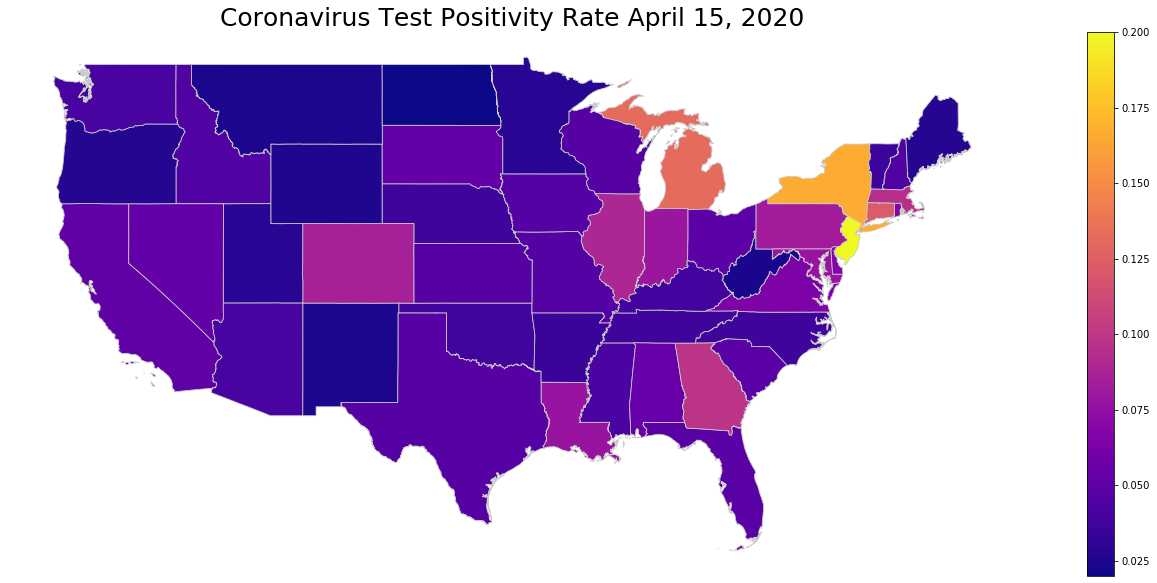

In [45]:
variable = 'percent_positive_4_15'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate April 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_4_15.png')

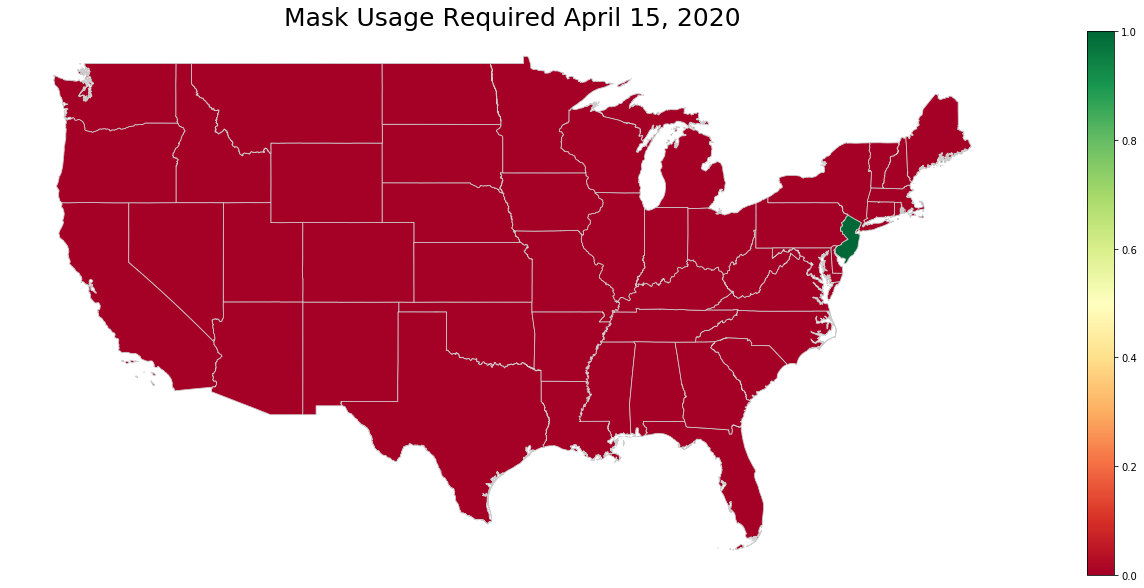

In [46]:
variable = 'mask_required_4_15'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required April 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_4_15.png')

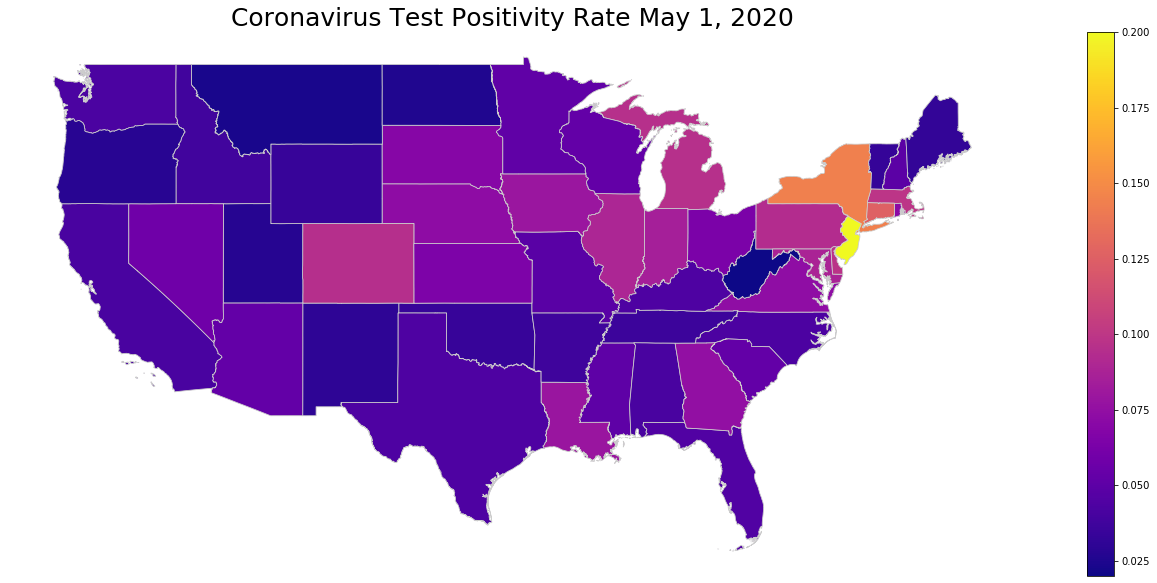

In [47]:
variable = 'percent_positive_5_1'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate May 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_5_1.png')

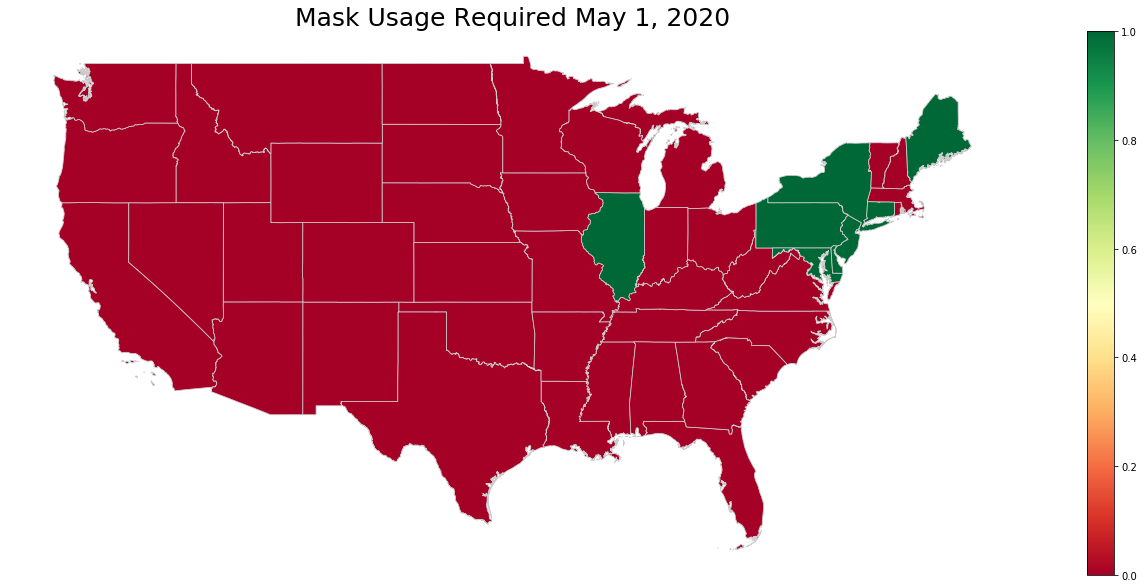

In [48]:
variable = 'mask_required_5_1'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required May 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_5_1.png')

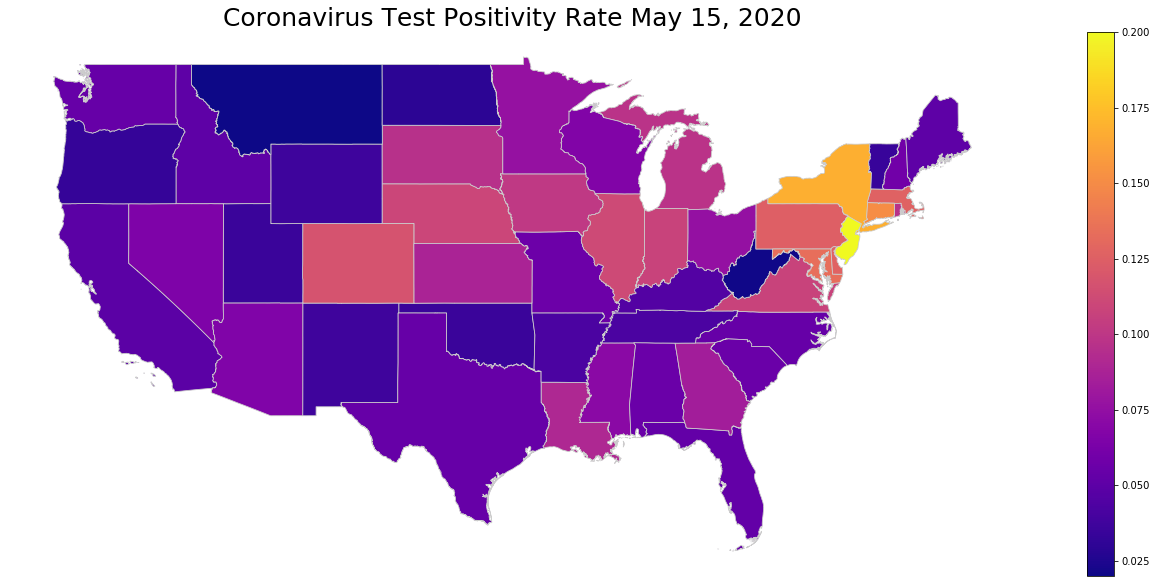

In [49]:
variable = 'percent_positive_5_15'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate May 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_5_15.png')

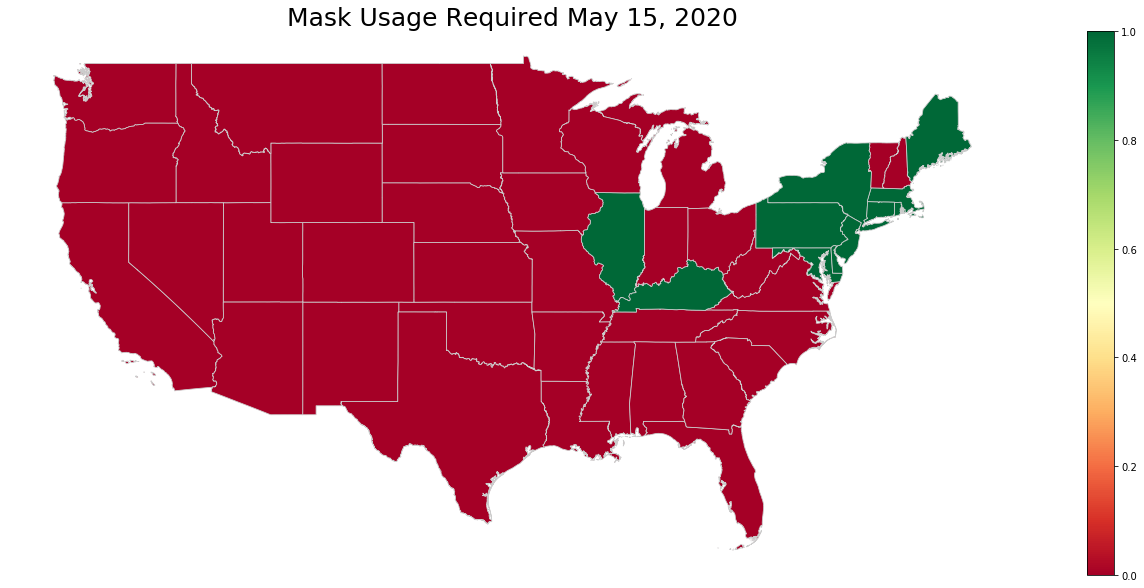

In [50]:
variable = 'mask_required_5_15'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required May 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_5_15.png')

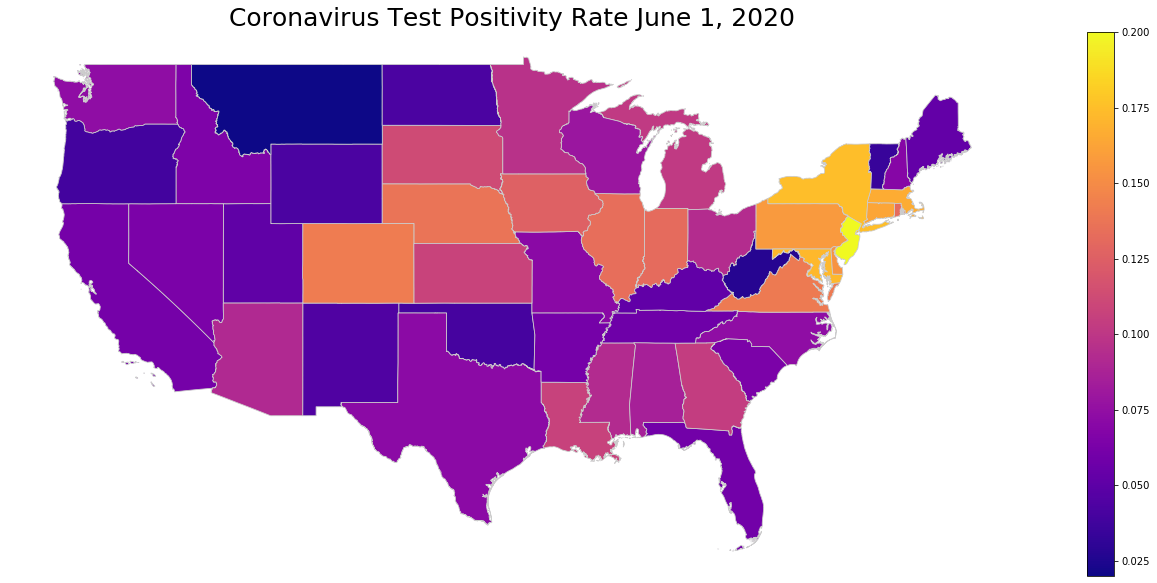

In [51]:
variable = 'percent_positive_6_1'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate June 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_6_1.png')

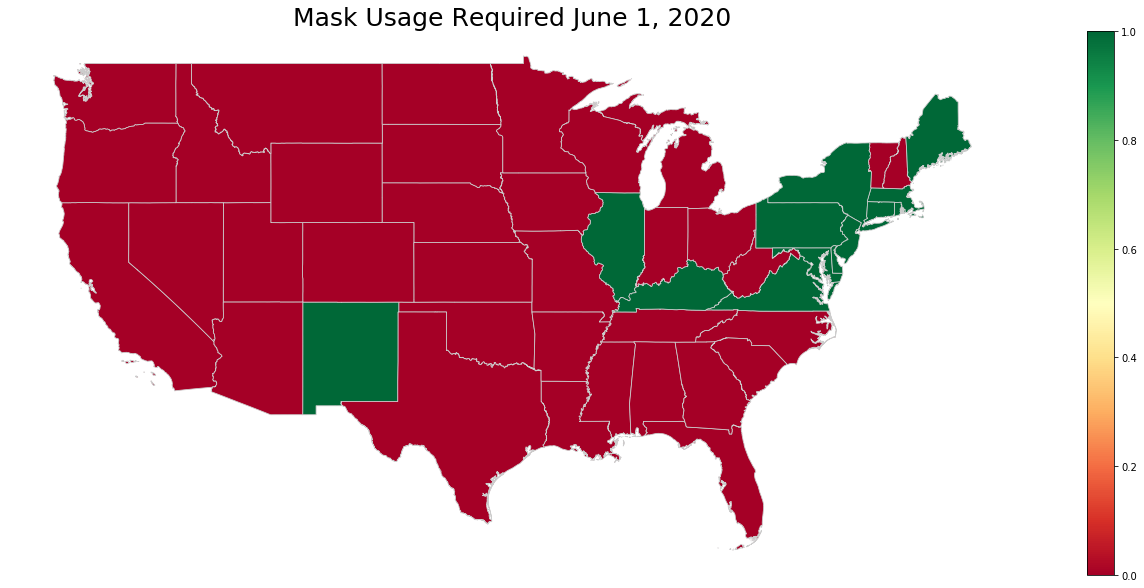

In [52]:
variable = 'mask_required_6_1'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required June 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_6_1.png')

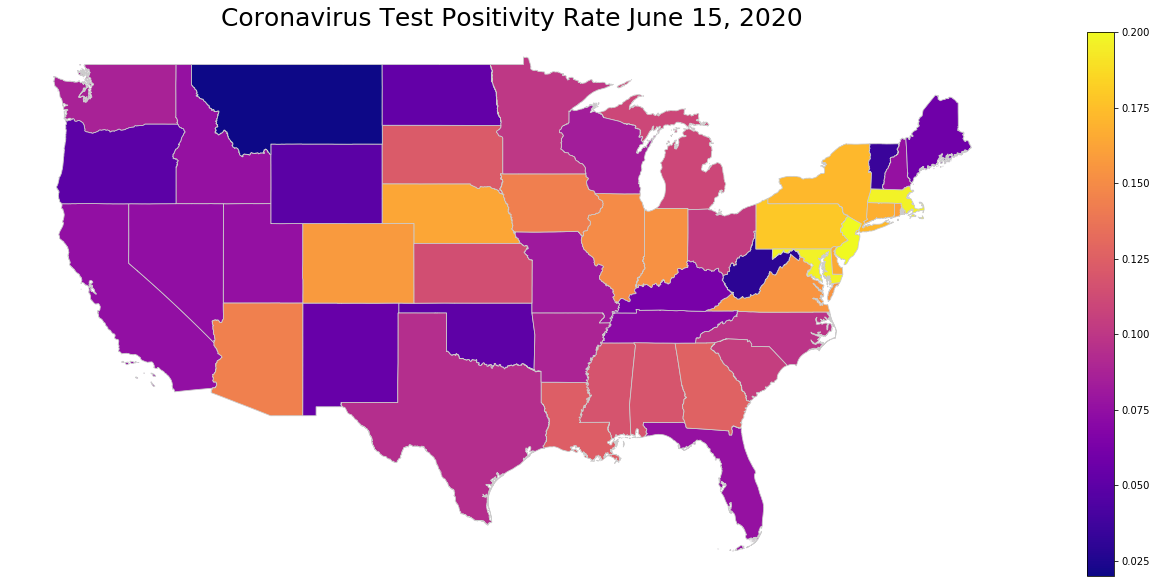

In [53]:
variable = 'percent_positive_6_15'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate June 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_6_15.png')

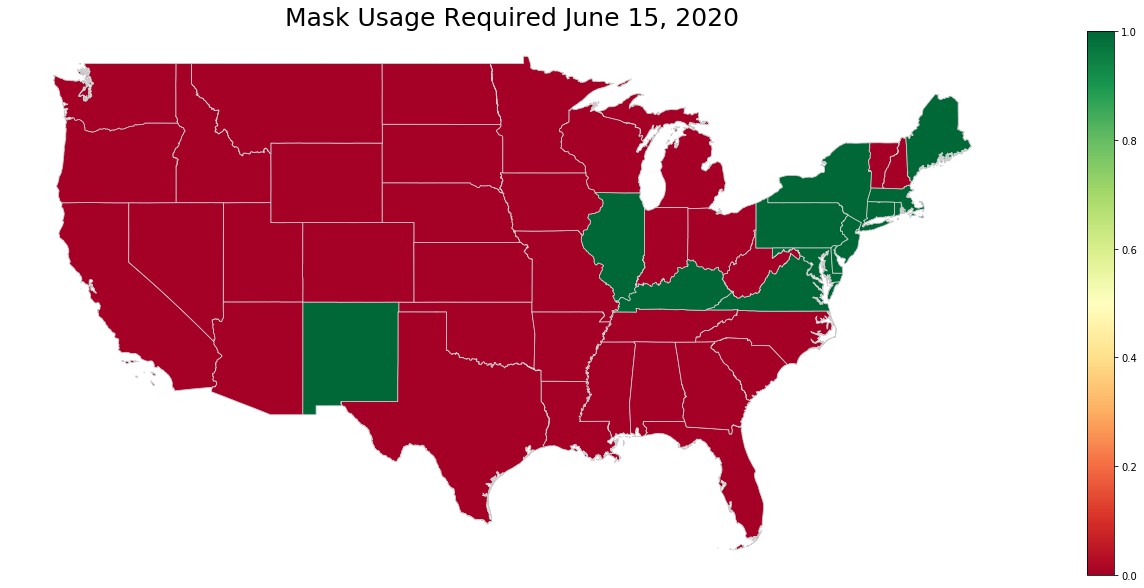

In [54]:
variable = 'mask_required_6_15'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required June 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_6_15.png')

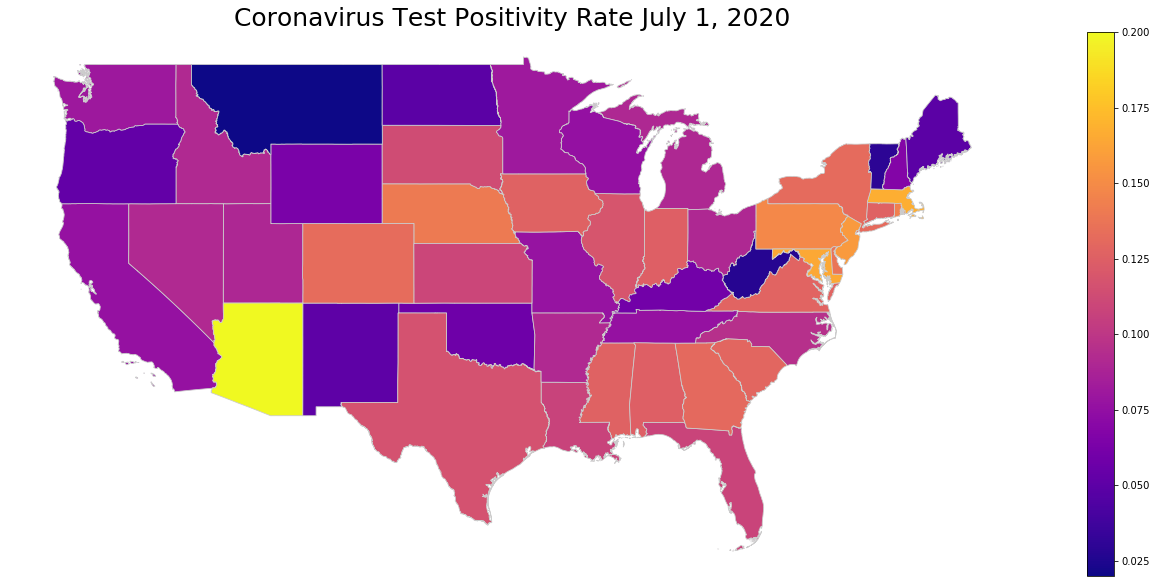

In [55]:
variable = 'percent_positive_7_1'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate July 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_7_1.png')

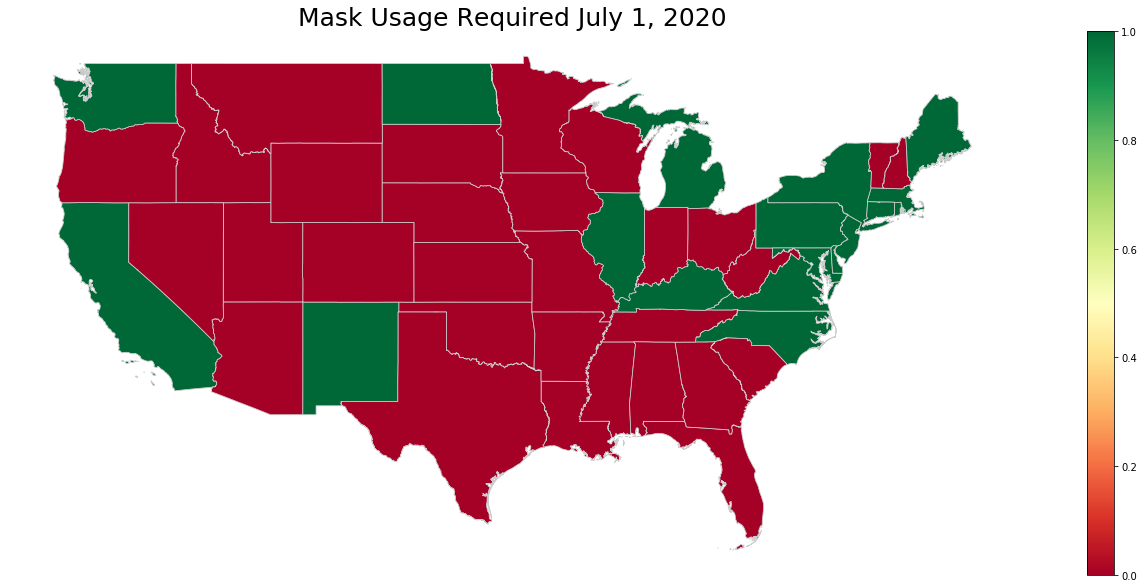

In [56]:
variable = 'mask_required_7_1'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required July 1, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_7_1.png')

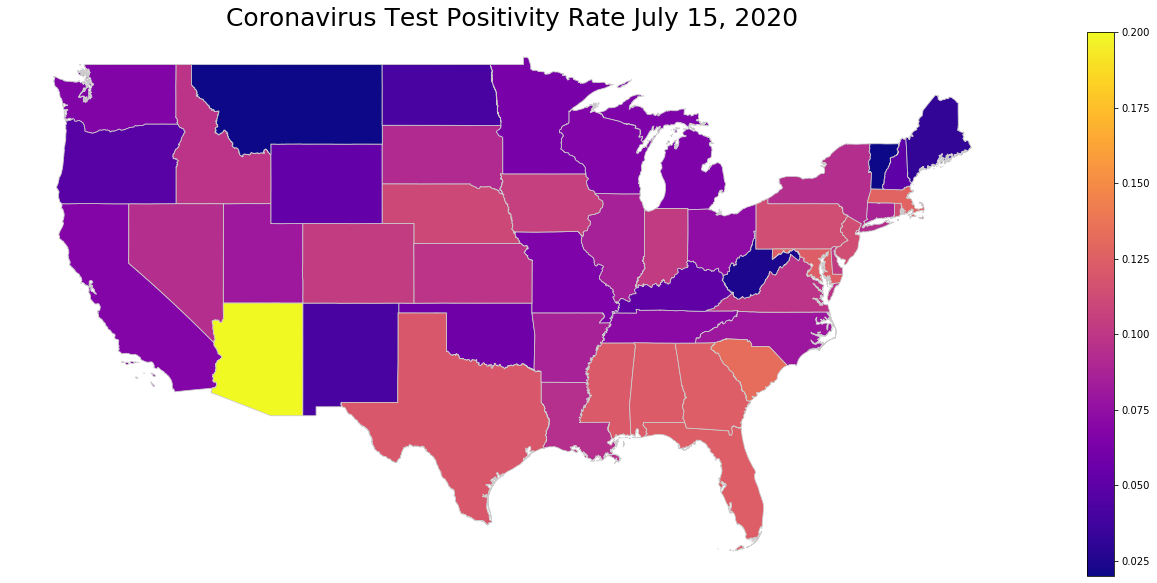

In [57]:
variable = 'percent_positive_7_15'

vmin, vmax = 0.02, 0.2

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Coronavirus Test Positivity Rate July 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Coronavirus_Positivity_Rate_7_15.png')

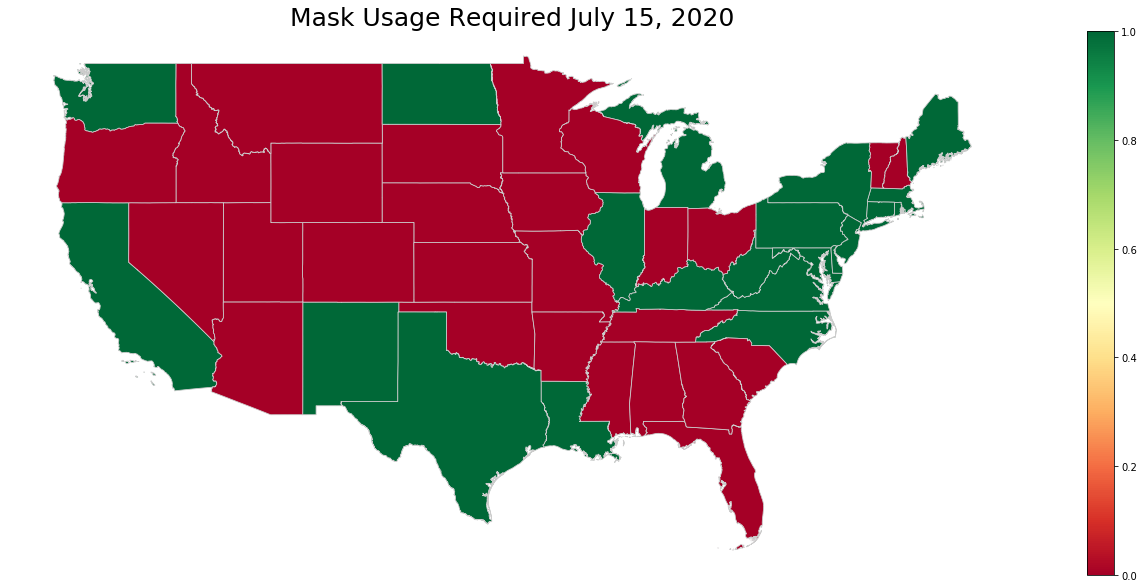

In [58]:
variable = 'mask_required_7_15'

vmin, vmax = 0,1

fig, ax = plt.subplots(1, figsize=(25,10))

ax.axis('off')

ax.set_title('Mask Usage Required July 15, 2020', fontdict={'fontsize':'25', 'fontweight' : '3'})


sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])

fig.colorbar(sm)

merged.plot(column=variable, cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Mask_Usage_required_7_15.png')